In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#Read the data
train = pd.read_excel("C:/Users/srina/Downloads/train data.xlsx")
train.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,16450,20,22588,97,1400,5,5,85,1110
1,7950,75,57144,110,1600,5,5,85,1070
2,10950,59,79660,86,1300,5,5,85,1065
3,8950,65,60000,86,1300,3,5,69,1015
4,9950,55,44537,97,1400,3,5,69,1025


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1292 non-null   int64
 1   Age_08_04      1292 non-null   int64
 2   KM             1292 non-null   int64
 3   HP             1292 non-null   int64
 4   cc             1292 non-null   int64
 5   Doors          1292 non-null   int64
 6   Gears          1292 non-null   int64
 7   Quarterly_Tax  1292 non-null   int64
 8   Weight         1292 non-null   int64
dtypes: int64(9)
memory usage: 91.0 KB


In [4]:
train.shape

(1292, 9)

In [5]:
train[train.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1267,24950,8,13253,116,2000,5,5,234,1320


In [6]:
train1=train.drop_duplicates()

In [7]:
train1.shape

(1291, 9)

In [8]:
train1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,10721.456235,56.010844,68670.360960,101.417506,1576.349342,4.034857,5.028660,87.143300,1071.810225
std,3602.167555,18.508323,37697.692119,15.257987,443.634123,0.952122,0.196756,40.790545,49.836916
min,4400.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,42655.000000,86.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63870.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11912.500000,70.000000,87698.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,31275.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1480.000000


In [9]:
train1['Price'].unique()

array([16450,  7950, 10950,  8950,  9950, 16750,  8900,  7450,  7250,
       18750, 11750,  9500,  9450, 12450, 10495,  9250,  8250, 11900,
       11500,  8750, 11250, 13950,  6500, 11950, 11990, 19500, 12200,
        8500, 16500,  8490, 10750, 12950, 10895,  6950, 16950,  7795,
        6450, 10450,  5950, 10500,  6900,  9900, 12900, 11450,  7400,
       23000, 13500,  7600, 17795, 22950, 15950,  6250, 10250, 15500,
        9800,  9750, 19950, 23950,  9000,  8700, 22750, 12850, 10995,
        7500,  9700,  8895,  9799, 14950,  7350,  6750,  8450, 18800,
       11895,  7750, 19900,  6150,  9850,  8800,  7999, 18500, 10900,
        9650, 17950, 31000,  9995, 17495, 24500, 21950,  6650,  9695,
       19750, 12000, 14350,  8100, 12500, 17450,  8050, 12750, 11290,
       14900, 19600, 18900,  8990,  8400,  7900, 24990, 13750, 10845,
       11495, 16250, 15750,  4750, 18450,  6495, 18950,  7800,  9400,
       21750, 13450, 20500, 21500, 15250,  8600,  5751, 12995, 22500,
       11650, 11695,

In [10]:
train1['Price'].value_counts()

8950     101
9950      74
10950     58
7950      54
11950     41
        ... 
7200       1
5150       1
16350      1
11290      1
6150       1
Name: Price, Length: 223, dtype: int64

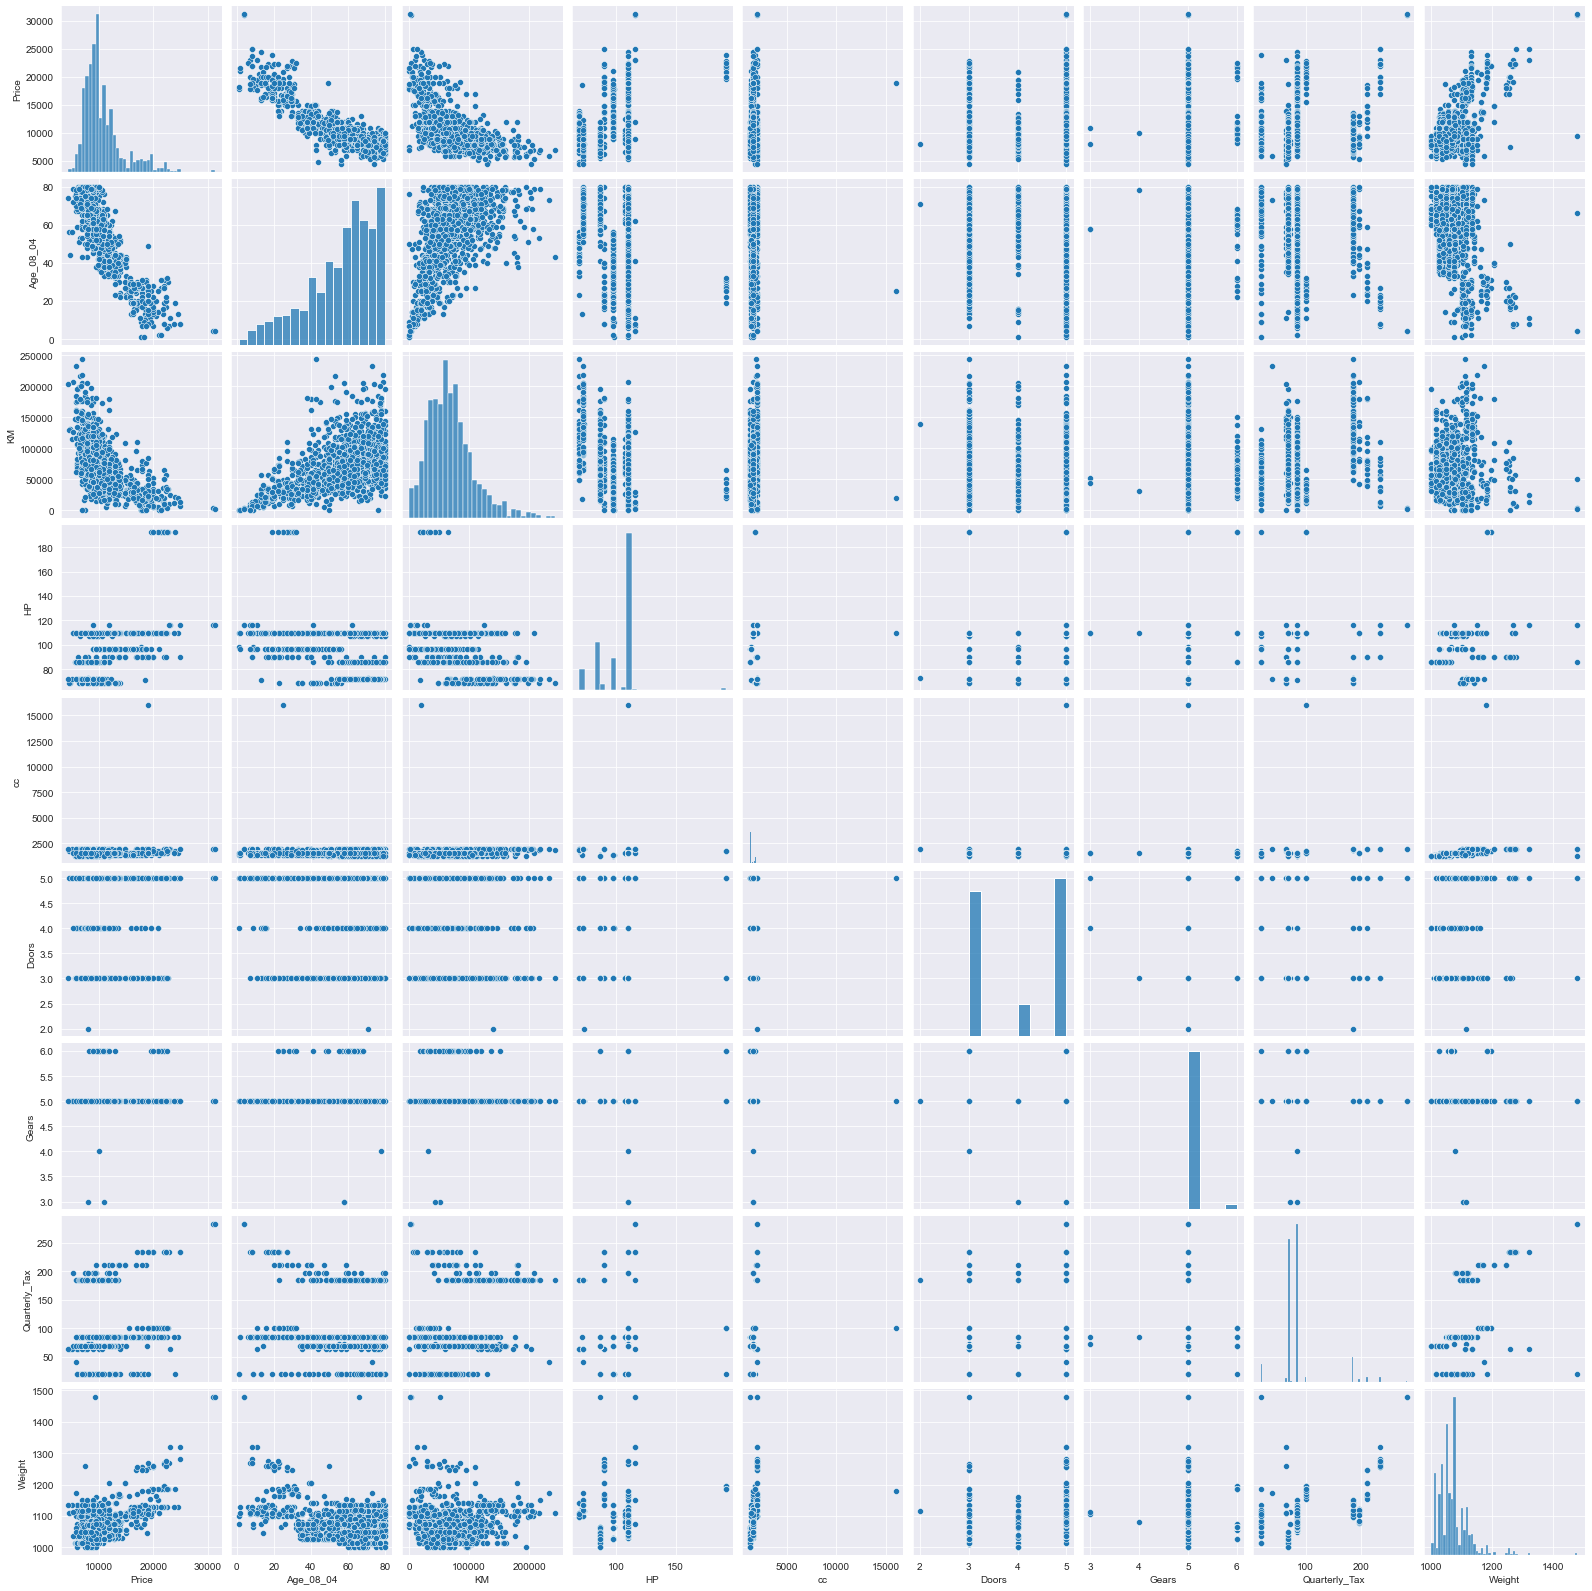

In [11]:
#Format the plot background and scatter plots for all the variables
sn.set_style(style='darkgrid')
sn.pairplot(train1)

<AxesSubplot:>

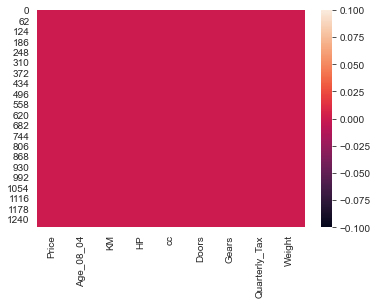

In [12]:
sn.heatmap(train1.isnull())


In [13]:
train1.isna().sum() #null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [14]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1291
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1291 non-null   int64
 1   Age_08_04      1291 non-null   int64
 2   KM             1291 non-null   int64
 3   HP             1291 non-null   int64
 4   cc             1291 non-null   int64
 5   Doors          1291 non-null   int64
 6   Gears          1291 non-null   int64
 7   Quarterly_Tax  1291 non-null   int64
 8   Weight         1291 non-null   int64
dtypes: int64(9)
memory usage: 100.9 KB


<AxesSubplot:>

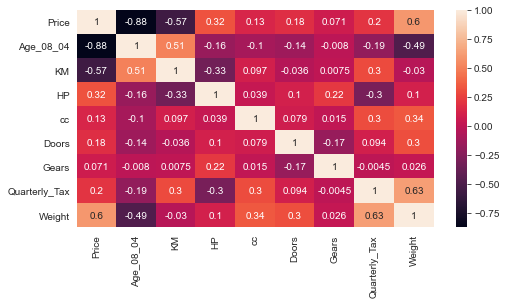

In [16]:
plt.figure(figsize=(8,4))
sn.heatmap(train1.corr(),annot = True)

In [17]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=train1).fit()

In [18]:
model.params

Intercept       -8715.177444
Age_08_04        -119.144040
KM                 -0.020404
HP                 28.311676
cc                 -0.133564
Doors             -28.201650
Gears             604.693920
Quarterly_Tax       1.229865
Weight             20.354547
dtype: float64

In [19]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -5.813208
Age_08_04       -43.312569
KM              -15.773293
HP                9.826912
cc               -1.504741
Doors            -0.679701
Gears             3.096602
Quarterly_Tax     0.883903
Weight           16.876173
dtype: float64 
 Intercept         7.726763e-09
Age_08_04        3.131187e-253
KM                2.316336e-51
HP                5.052907e-22
cc                1.326371e-01
Doors             4.968166e-01
Gears             2.000001e-03
Quarterly_Tax     3.769146e-01
Weight            7.383121e-58
dtype: float64


In [20]:
(model.rsquared,model.rsquared_adj)

(0.8682064944062866, 0.867384070034407)

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1056.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        14:13:32   Log-Likelihood:                -11096.
No. Observations:                1291   AIC:                         2.221e+04
Df Residuals:                    1282   BIC:                         2.226e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8715.1774   1499.203     -5.813      0.000   -1.17e+04   -5774.017
Age_08_04      -119.1440      2.751    -43.313      0.000    -124.541    -113.747
KM               -0.0204      0.001    -15.773      0.000      -0.023      -0.018
HP               28.3117      2.881      9.827      0.000      22.660      33.964
cc               -0.1336      0.089     -1.505      0.133      -0.308       0.041
Doors           -28.2017     41.491     -0.680      0.497    -109.600      53.197
Gears           604.6939    195.277      3.097      0.002     221.597     987.791
Quarterly_Tax     1.2299      1.391      0.884      0.377      -1.500       3.960
Weight           20.3545      1.206     16.876      0.000      17.988      22.721
==============================================================================
Omnibus:                      128.018   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.931
Skew:                          -0.224   Prob(JB):                    9.62e-166
Kurtosis:                       6.732   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We need to check how these variables individually affect price . So we will build a Simple Linear Regression model for each variable and check the p values

In [22]:
#Simple Linear Regression between price and age
model_age = smf.ols('Price~Age_08_04',data=train1).fit()
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     4315.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        14:13:32   Log-Likelihood:                -11455.
No. Observations:                1291   AIC:                         2.291e+04
Df Residuals:                    1289   BIC:                         2.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    153.354    132.289      0.000       2e+04    2.06e+04
Age_08_04   -170.7818      2.600    -65.691      0.000    -175.882    -165.681
==============================================================================
Omnibus:                      262.516   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1477.740
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       7.979   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see that the p-value for age is 0 which is less than 0.05 ,so the price is actually dependent on Age.

In [23]:
#Simple Linear Regression between price and km
model_km = smf.ols('Price~KM',data=train1).fit()
model_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     617.4
Date:                Thu, 06 May 2021   Prob (F-statistic):          1.13e-111
Time:                        14:13:32   Log-Likelihood:                -12151.
No. Observations:                1291   AIC:                         2.431e+04
Df Residuals:                    1289   BIC:                         2.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.446e+04    171.424     84.327      0.000    1.41e+04    1.48e+04
KM            -0.0544      0.002    -24.847      0.000      -0.059      -0.050
==============================================================================
Omnibus:                      318.939   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.596
Skew:                           1.316   Prob(JB):                    1.56e-171
Kurtosis:                       5.774   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We could see that the p-value for km is 0 which is less than 0.05 ,so the price is actually dependent on km.

In [24]:
#Simple Linear Regression between price and hp
model_hp = smf.ols('Price~HP',data=train1).fit()
model_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     148.3
Date:                Thu, 06 May 2021   Prob (F-statistic):           2.26e-32
Time:                        14:13:32   Log-Likelihood:                -12333.
No. Observations:                1291   AIC:                         2.467e+04
Df Residuals:                    1289   BIC:                         2.468e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3030.3933    638.647      4.745      0.000    1777.491    4283.296
HP            75.8357      6.227     12.178      0.000      63.619      88.052
==============================================================================
Omnibus:                      373.211   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              970.391
Skew:                           1.521   Prob(JB):                    1.92e-211
Kurtosis:                       5.965   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see that the p-value for hp is 0 which is less than 0.05 ,so the price is actually dependent on hp.

In [25]:
#Simple Linear Regression between price and cc
model_cc = smf.ols('Price~cc',data=train1).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     21.88
Date:                Thu, 06 May 2021   Prob (F-statistic):           3.21e-06
Time:                        14:13:32   Log-Likelihood:                -12393.
No. Observations:                1291   AIC:                         2.479e+04
Df Residuals:                    1289   BIC:                         2.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9067.9265    367.240     24.692      0.000    8347.473    9788.380
cc             1.0490      0.224      4.677      0.000       0.609       1.489
==============================================================================
Omnibus:                      392.159   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1042.492
Skew:                           1.592   Prob(JB):                    4.22e-227
Kurtosis:                       6.040   Cond. No.                     6.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We could see that the p-value for cc is 0 which is less than 0.05 ,so the price is actually dependent on cc.
But when we used cc to fit the model the p -value came as 0.133 (greater than 0.05). This means that cc individually is affecting the Profit but when it is used by other features it is not. So we can say there is a multicollinearity problem and we will use VIF futher to check it.

In [26]:
#Simple Linear Regression between price and door
model_door = smf.ols('Price~Doors',data=train1).fit()
model_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     41.33
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.81e-10
Time:                        14:13:32   Log-Likelihood:                -12383.
No. Observations:                1291   AIC:                         2.477e+04
Df Residuals:                    1289   BIC:                         2.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8030.8151    430.009     18.676      0.000    7187.220    8874.410
Doors        666.8492    103.727      6.429      0.000     463.357     870.341
==============================================================================
Omnibus:                      397.345   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.876
Skew:                           1.608   Prob(JB):                    4.78e-233
Kurtosis:                       6.090   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see that the p-value for doors is 0 which is less than 0.05 ,so the price is actually dependent on doors.
But when we used doors to fit the model the p -value came as 0.497 (greater than 0.05). This means that doors individually is affecting the Profit but when it is used by other features it is not. So we can say there is a multicollinearity problem and we will use VIF futher to check it.

In [27]:
#Simple Linear Regression between price and Gears
model_gear = smf.ols('Price~Gears',data=train1).fit()
model_gear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.456
Date:                Thu, 06 May 2021   Prob (F-statistic):             0.0112
Time:                        14:13:32   Log-Likelihood:                -12400.
No. Observations:                1291   AIC:                         2.480e+04
Df Residuals:                    1289   BIC:                         2.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4222.4963   2559.819      1.650      0.099    -799.372    9244.365
Gears       1292.3841    508.657      2.541      0.011     294.498    2290.271
==============================================================================
Omnibus:                      405.573   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1113.619
Skew:                           1.633   Prob(JB):                    1.52e-242
Kurtosis:                       6.168   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see that the p-value for gears is 0.01 which is less than 0.05 ,so the price is actually dependent on gears.

In [28]:
#Simple Linear Regression between price and quaterly tax
model_qt = smf.ols('Price~Quarterly_Tax',data=train1).fit()
model_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     56.51
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.04e-13
Time:                        14:13:33   Log-Likelihood:                -12376.
No. Observations:                1291   AIC:                         2.476e+04
Df Residuals:                    1289   BIC:                         2.477e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9144.3186    231.625     39.479      0.000    8689.916    9598.721
Quarterly_Tax    18.0982      2.407      7.518      0.000      13.375      22.821
==============================================================================
Omnibus:                      325.385   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.386
Skew:                           1.410   Prob(JB):                    5.52e-155
Kurtosis:                       5.292   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see that the p-value for quaterlytax is 0 which is less than 0.05 ,so the price is actually dependent on quaterlytax.
But when we used doors to fit the model the p -value came as 0.377 (greater than 0.05). This means that quaterlytax individually is affecting the Profit but when it is used by other features it is not. So we can say there is a multicollinearity problem and we will use VIF futher to check it.

In [29]:
#Simple Linear Regression between price and weight
model_wt = smf.ols('Price~Weight',data=train1).fit()
model_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     728.7
Date:                Thu, 06 May 2021   Prob (F-statistic):          1.39e-127
Time:                        14:13:33   Log-Likelihood:                -12114.
No. Observations:                1291   AIC:                         2.423e+04
Df Residuals:                    1289   BIC:                         2.424e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.584e+04   1726.508    -20.756      0.000   -3.92e+04   -3.24e+04
Weight        43.4373      1.609     26.995      0.000      40.281      46.594
==============================================================================
Omnibus:                       73.915   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.553
Skew:                           0.112   Prob(JB):                     1.78e-59
Kurtosis:                       5.231   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We could see that the p-value for weight is 0 which is less than 0.05 ,so the price is actually dependent on weight.

In [30]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=train1).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=train1).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=train1).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=train1).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=train1).fit().rsquared  
vif_doors = 1/(1-rsq_doors) 

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=train1).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',train1).fit().rsquared  
vif_qt = 1/(1-rsq_qt) 

rsq_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=train1).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 


In [31]:
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.943198
1,KM,1.782741
2,HP,1.448631
3,cc,1.162443
4,Doors,1.169943
5,Gears,1.106680
6,Quarterly_Tax,2.414858
7,Weight,2.708591


In [32]:
#linear regression model 
model2 = smf.ols('Price~Age_08_04+KM+HP+Quarterly_Tax+Weight',data=train1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1672.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        14:13:33   Log-Likelihood:                -11102.
No. Observations:                1291   AIC:                         2.222e+04
Df Residuals:                    1285   BIC:                         2.225e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5433.9429   1167.680     -4.654      0.000   -7724.711   -3143.175
Age_08_04      -119.4038      2.761    -43.254      0.000    -124.819    -113.988
KM               -0.0203      0.001    -15.682      0.000      -0.023      -0.018
HP               30.1182      2.794     10.780      0.000      24.637      35.599
Quarterly_Tax     1.4156      1.380      1.026      0.305      -1.292       4.123
Weight           19.6477      1.146     17.144      0.000      17.399      21.896
==============================================================================
Omnibus:                      116.961   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.777
Skew:                          -0.205   Prob(JB):                    1.07e-137
Kurtosis:                       6.400   Cond. No.                     2.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
(model_age.rsquared,model_age.aic)

(0.7699974899079179, 22914.11078752809)

In [34]:
(model_km.rsquared,model_km.aic)

(0.3238544855371537, 24306.21943997772)

In [35]:
(model_hp.rsquared,model_hp.aic)

(0.10318428348855946, 24670.85217267703)

In [36]:
(model_cc.rsquared,model_cc.aic)

(0.01668941644219646, 24789.720517846974)

In [37]:
(model_qt.rsquared,model_qt.aic)

(0.042001265780595154, 24756.053086123513)

In [38]:
(model_wt.rsquared,model_wt.aic)

(0.36116098615695447, 24232.947672690476)

on comparing the r sqaure and Aic values , we can ignore cc & Quaterlytax as the have low r square value and high aic value, compared to others.

In [39]:
model3 = smf.ols('Price~Age_08_04+KM+HP+Weight',data=train1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2090.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        14:13:34   Log-Likelihood:                -11103.
No. Observations:                1291   AIC:                         2.222e+04
Df Residuals:                    1286   BIC:                         2.224e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6010.1065   1023.708     -5.871      0.000   -8018.428   -4001.785
Age_08_04   -119.5657      2.756    -43.383      0.000    -124.973    -114.159
KM            -0.0199      0.001    -16.033      0.000      -0.022      -0.017
HP            28.9914      2.569     11.285      0.000      23.951      34.031
Weight        20.3917      0.887     22.982      0.000      18.651      22.132
==============================================================================
Omnibus:                      132.350   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.118
Skew:                          -0.265   Prob(JB):                    2.64e-167
Kurtosis:                       6.739   Cond. No.                     2.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

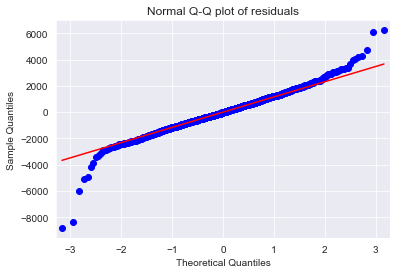

In [40]:
#Q-Q plot to check normality of errors
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [41]:
list(np.where(model3.resid<-6000))


[array([451, 572], dtype=int64)]

In [42]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

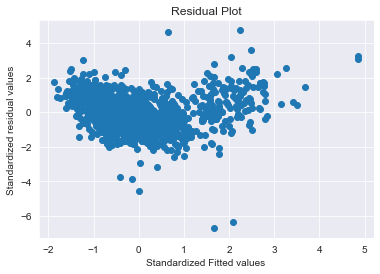

In [43]:
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


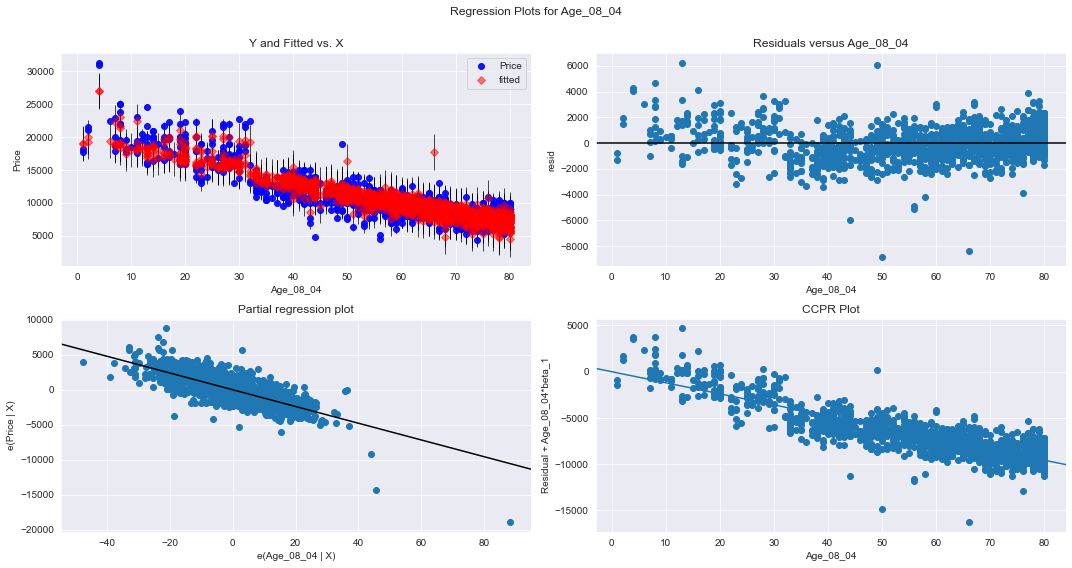

In [44]:
#Residuals vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "Age_08_04", fig=fig)
plt.show()

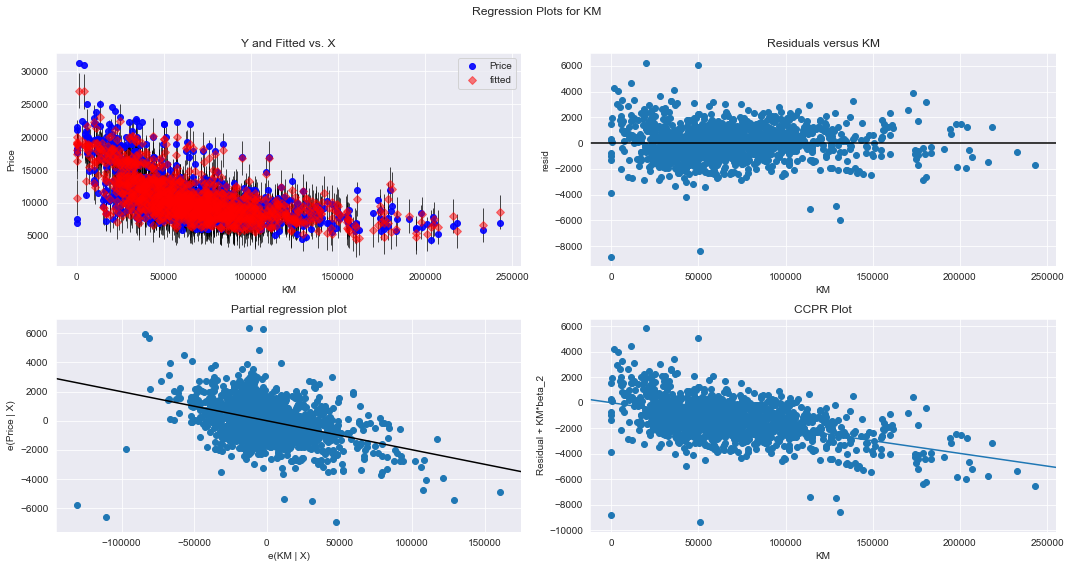

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "KM", fig=fig)
plt.show()

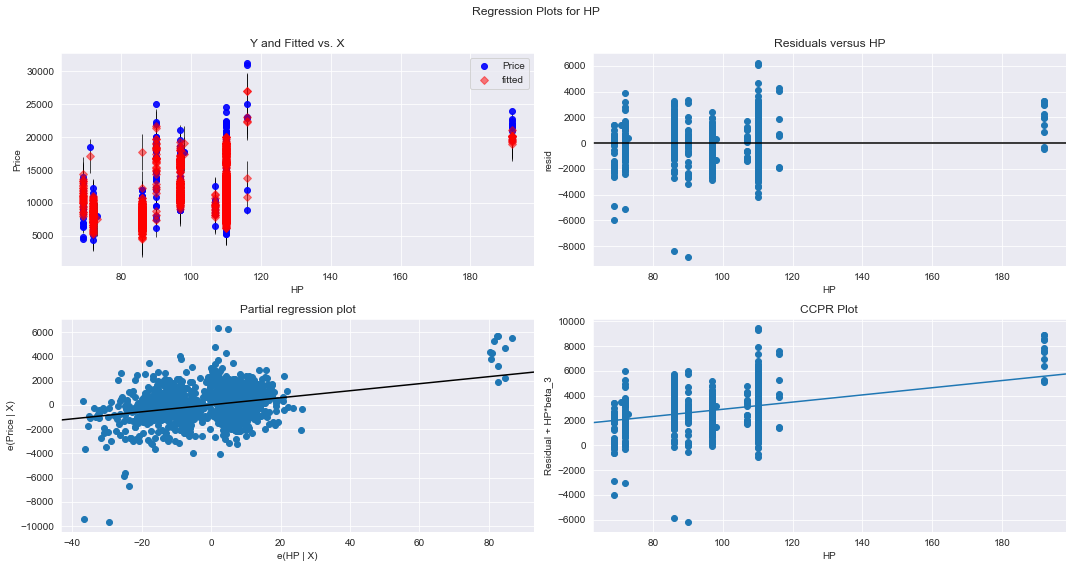

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "HP", fig=fig)
plt.show()

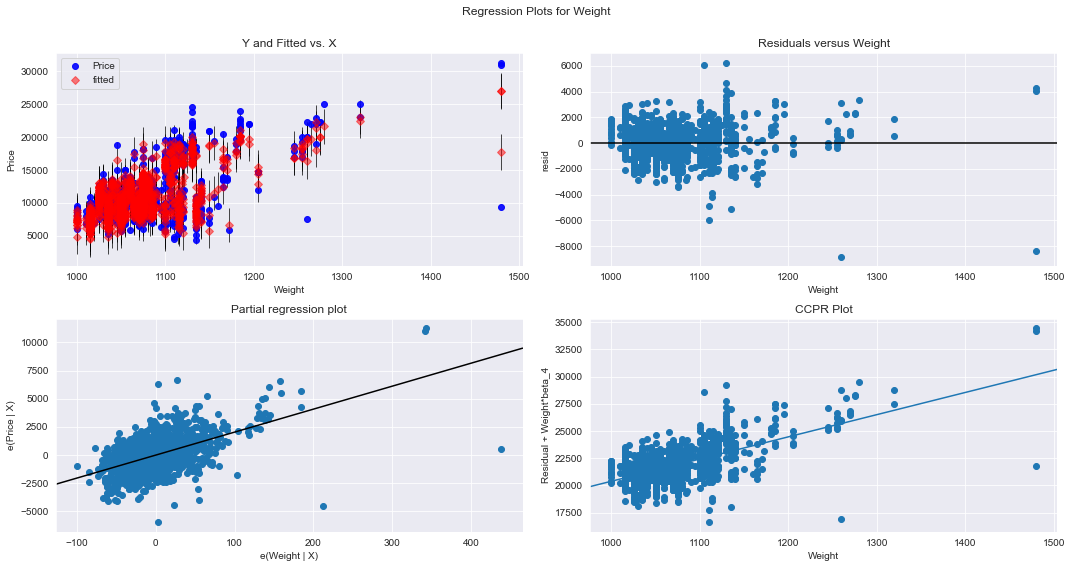

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "Weight", fig=fig)
plt.show()

In [48]:
#Detecting Influencers/Outliers using Cook's distance
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

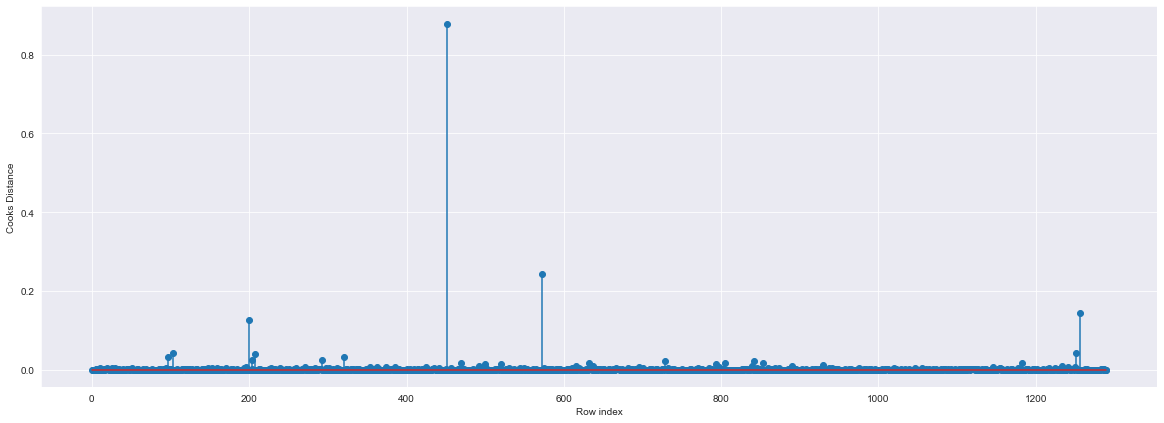

In [49]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
(np.argmax(c),np.max(c))

(451, 0.878544886666176)

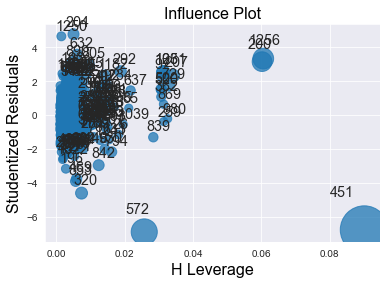

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model3)
plt.show()

In [52]:
#improving the model
train2=train1.drop(train1.index[[451,572]],axis=0).reset_index()

In [53]:
#build final model
final_model= smf.ols('Price~Age_08_04+KM+HP+Weight',data = train2).fit()

In [54]:
(final_model.rsquared,final_model.rsquared_adj)

(0.876440431642752, 0.8760555108690534)

In [55]:
#Detecting Influencers/Outliers using Cook's distance
model_influence = final_model.get_influence()
(c, _) = model_influence.cooks_distance

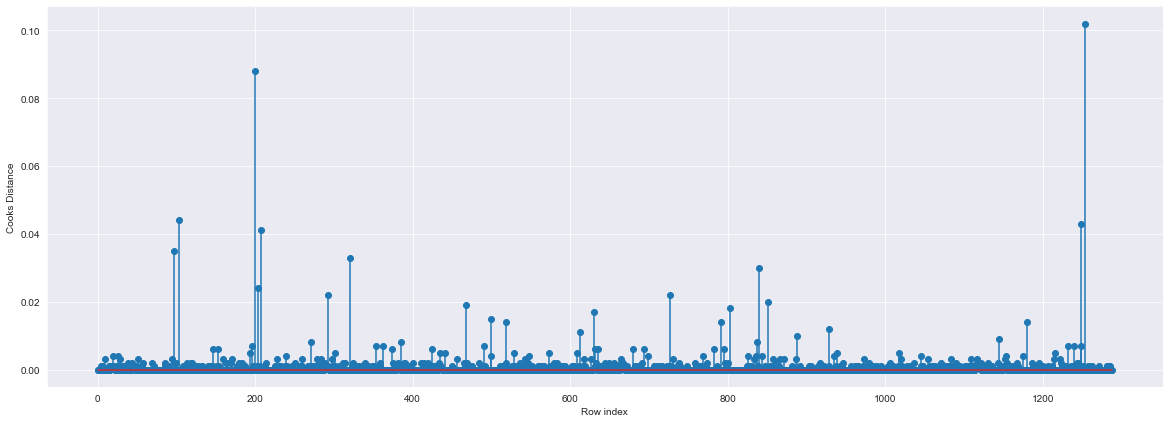

In [56]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
(np.argmax(c),np.max(c))

(1254, 0.10214378790564846)

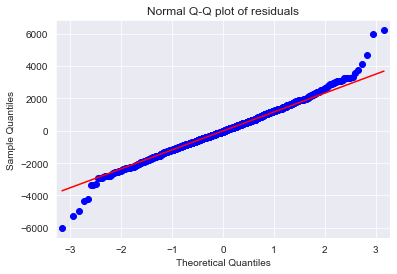

In [58]:
#Q-Q plot to check normality of errors
import statsmodels.api as sm
qqplot=sm.qqplot(final_model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [59]:
list(np.where(model3.resid<-4000))

[array([196, 320, 451, 469, 572, 853], dtype=int64)]

In [60]:
#improving the model
train3=train2.drop(train2.index[[1254,196]],axis=0).reset_index()

In [61]:
final_model1= smf.ols('Price~Age_08_04+KM+HP+Weight',data = train3).fit()

In [62]:
(final_model1.rsquared,final_model1.rsquared_adj)

(0.8750156803278258, 0.8746257136517817)

In [63]:
#Detecting Influencers/Outliers using Cook's distance
model_influence = final_model1.get_influence()
(c, _) = model_influence.cooks_distance

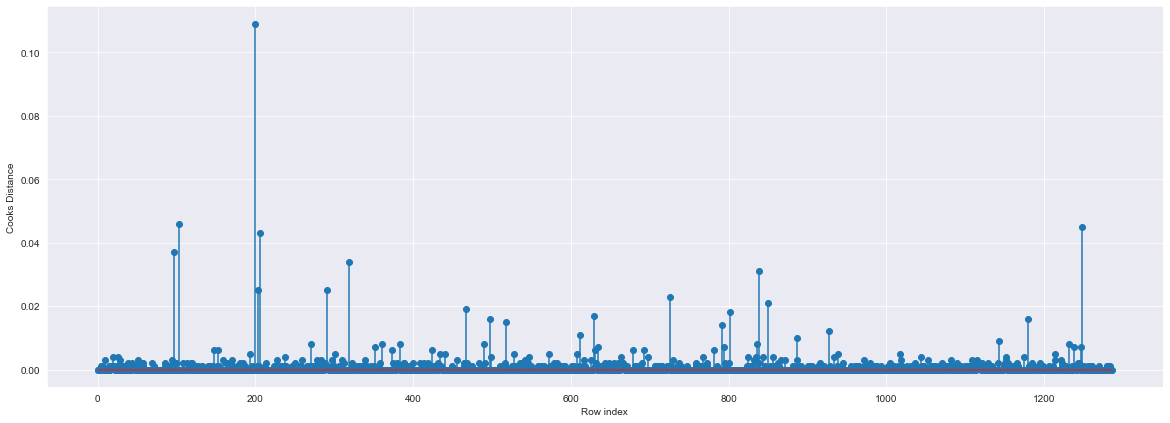

In [64]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
(np.argmax(c),np.max(c))

(199, 0.10916683230718664)

In [66]:
#predicting new data
test = pd.read_excel("C:/Users/srina/Downloads/test data.xlsx")

In [67]:
final_model1.predict(test)

0      19088.605922
1      10404.073651
2      11161.283768
3       9756.731869
4       8255.844087
           ...     
139     7775.361485
140    13655.980983
141     9309.818910
142     8728.276078
143    10831.310786
Length: 144, dtype: float64

In [68]:
final_model1.predict(train3)

0       16608.228362
1        9006.189574
2        9587.568174
3        8193.111452
4       10195.441608
            ...     
1282     9400.169255
1283     9173.727795
1284     8181.604370
1285    12238.366909
1286     8456.794990
Length: 1287, dtype: float64

In [69]:
pred = final_model1.predict(train3)
pred

0       16608.228362
1        9006.189574
2        9587.568174
3        8193.111452
4       10195.441608
            ...     
1282     9400.169255
1283     9173.727795
1284     8181.604370
1285    12238.366909
1286     8456.794990
Length: 1287, dtype: float64

In [70]:
RMSE=np.sqrt(np.mean((train3.Price - pred)**2))
RMSE

1257.999979665703